# Random Forest y Bagging en Clasificación
Al usar algoritmos de bagging en clasificación, como es el caso de los bosques aleatorios, la construcción es análoga a la de clasificación. La diferencia reside en la forma de agrupar los resultados de algoritmos simples. En este caso se realiza un procedimiento que se conoce como votación. Es decir, elegir el valor de la variable dependiente más repetida en los algoritmos independientes.

In [1]:
# librerias
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split

En este caso se va a utilizar un algoritmo Random Forest para clasificar dígitos. Para ello se carga primero un dataset de dígitos y se asignan las variables independientes y la dependiente a X e Y, respectivamente.

2


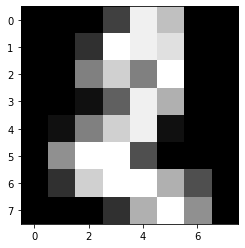

In [3]:
# dataset de números
digits = load_digits()
X, y = digits.data, digits.target
idx = 2
img = X[idx, :].reshape(8,8)
print(y[idx])
plt.imshow(img, cmap="gray")
plt.show()

In [6]:
# entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier()
params = {"n_estimators" : [10,50,100,200],
         "max_depth" : [5,7,9], 
         "max_features" : [10, "sqrt"]}

clf_grid = GridSearchCV(clf, params, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'max_features': [10, 'sqrt'],
                         'n_estimators': [10, 50, 100, 200]})

In [8]:
print(u'Mejores parametros del modelo: {}'.format(clf_grid.best_params_))
print(u'- Accuracy de los datos de train: {} \n- Accuracy de los datos del test: {}'.format(clf_grid.score(X_train, y_train), round(clf_grid.score(X_test, y_test), 2)))

Mejores parametros del modelo: {'max_depth': 9, 'max_features': 10, 'n_estimators': 100}
- Accuracy de los datos de train: 1.0 
- Accuracy de los datos del test: 0.98
